AUTHOR:

  - [Github](https://github.com/DavidSatria29)

#Import The Required Library

This section will install and import the modules needed for EDA and hypothesis testing.

In [1]:
# Importing necessary libraries
import importlib  # For importing a module dynamically
import subprocess  # For running system commands (e.g., pip install)

# Function to install a package if it's not already installed
def install_if_missing(package):
    try:
        # Trying to import the module
        importlib.import_module(package)
    except ImportError:
        # If the module is not found, install it using pip
        subprocess.check_call(["pip", "install", package])

# List of packages to check and install if missing
packages = ['pandas', 'numpy', 'seaborn', 'matplotlib', 'scikit-learn', 'plotly', 'openpyxl']

# Loop through the list of packages and install them if necessary
for package in packages:
    install_if_missing(package)



In [2]:
# Importing the warnings library to control warning messages
import warnings

# Ignoring all warnings to prevent them from showing up in the output
warnings.filterwarnings('ignore')


In [3]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import math  # For mathematical functions
import itertools  # For working with iterators (combinations, permutations)

# Importing libraries for data visualization
import seaborn as sns  # For statistical data visualization
import matplotlib.pylab as plt  # For general plotting and visualization
%matplotlib inline

# Importing scikit-learn preprocessing tools
from sklearn.preprocessing import StandardScaler  # For standardizing features (zero mean, unit variance)
from sklearn.preprocessing import MinMaxScaler  # For scaling features to a given range, usually [0, 1]

# Importing statistical functions from scipy
from scipy.stats import norm  # For normal distribution functions
from scipy.stats import chi2_contingency  # For chi-squared test of independence
from scipy.stats import pointbiserialr  # For point-biserial correlation coefficient (for binary vs continuous data)
from scipy.stats import ttest_ind  # For ttest_ind ()
from scipy.stats import pearsonr  # For Pearson correlation coefficient (for continuous variables)
from scipy import stats  # General statistical functions (e.g., descriptive stats, hypothesis tests)



#Reading and Understanding The Dataset

This dataset comes from Kaggle platform. This dataset provides a detailed health profile of individuals in Indonesia, focusing on heart attack prediction. It includes key demographic, clinical, lifestyle, and environmental factors associated with cardiovascular risks. The dataset reflects real-world health trends in Indonesia, considering factors such as hypertension, diabetes, obesity, smoking, and pollution exposure.

Indonesia has seen a rising trend in cardiovascular diseases, making early prediction and prevention crucial. The dataset is structured to support machine learning models for predicting heart attack risks, public health research, and epidemiological studies. [dataset](https://www.kaggle.com/datasets/ankushpanday2/heart-attack-prediction-in-indonesia)



In [4]:
# Reading the dataset from a CSV file and loading it into a pandas DataFrame
dataset = pd.read_csv('heart_attack_prediction_indonesia.csv')

# Displaying the first 5 rows of the dataset to get a preview of the data
dataset.head(5)



,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [5]:
# Displaying concise summary information about the dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

This dataset has 158355 rows and 28 columns. The columns have 17 numeric attributes and 10 categorical attributes.

In [6]:
# Using the describe() function to generate summary statistics of the dataset
dataset.describe()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Selecting columns with data type 'object' (usually categorical or text data)
object_columns = dataset.select_dtypes(include=['object']).columns

# Looping through each column with object data type and printing its unique values
for col in object_columns:
    print(f'{col}: {dataset[col].unique()}')


gender: ['Male' 'Female']
region: ['Rural' 'Urban']
income_level: ['Middle' 'Low' 'High']
smoking_status: ['Never' 'Past' 'Current']
alcohol_consumption: [nan 'Moderate' 'High']
physical_activity: ['High' 'Moderate' 'Low']
dietary_habits: ['Unhealthy' 'Healthy']
air_pollution_exposure: ['Moderate' 'High' 'Low']
stress_level: ['Moderate' 'High' 'Low']
EKG_results: ['Normal' 'Abnormal']


It can be seen that the categorical attributes or objects in the dataset only have a maximum of 3 unique values. It can also be seen that there is a balance between the types of categorical attributes, namely nominal and ordinal.

In [8]:
# Getting the list of all columns in the dataset
all_columns = dataset.columns

# Initializing an empty list to store continuous columns
continous_columns = []

# Looping through all columns to check if they have more than 3 unique values
for col in all_columns:
    if dataset[col].nunique() > 3:  # If the number of unique values is greater than 3, consider it continuous
        continous_columns.append(col)

# Displaying the list of continuous columns
continous_columns


['age',
 'cholesterol_level',
 'waist_circumference',
 'sleep_hours',
 'blood_pressure_systolic',
 'blood_pressure_diastolic',
 'fasting_blood_sugar',
 'cholesterol_hdl',
 'cholesterol_ldl',
 'triglycerides']

This continuous column list is created with the aim of seeing what continuous columns are in the dataset. It is also used for further analysis.

In [9]:
# Creating a list of categorical columns by excluding continuous columns from all columns
categorical_columns = [col for col in dataset.columns if col not in continous_columns]
categorical_columns


['gender',
 'region',
 'income_level',
 'hypertension',
 'diabetes',
 'obesity',
 'family_history',
 'smoking_status',
 'alcohol_consumption',
 'physical_activity',
 'dietary_habits',
 'air_pollution_exposure',
 'stress_level',
 'EKG_results',
 'previous_heart_disease',
 'medication_usage',
 'participated_in_free_screening',
 'heart_attack']

It can be seen that the category column also consists of several columns with numeric data types. The reason why I include columns with numeric type is because it is a column with binary type where the value can only be 1 or 0. Although technically it is a column with numeric data type, by nature it is a column with categorical data type where the value of the column is predefined as 1 or 0. This assumption is only used in the analysis and visualization section.

#Data Cleaning

In the data cleaning stage, several important processes will be performed to ensure the quality and reliability of the dataset. First, missing values were handled with an approach that was appropriate to the characteristics of each feature, either through imputation of statistical values such as mean/median, or by deleting rows containing blank values if the number was insignificant. Furthermore, duplicate data was identified and removed to avoid bias and redundancy in the analysis. Finally, outliers on numerical features were identified using the Interquartile Range (IQR) method, and rows that had values outside the lower and upper limits were removed so as not to affect the data distribution and analysis results. These steps were carried out systematically to ensure that the data used was clean, representative, and ready to be used in the advanced analysis and machine learning modeling stages.


In [10]:
# Creating a copy of the dataset to preserve the original data and work with a cleaned version
dataset_cleaned = dataset.copy()


##Missing Values

In the missing value handling stage, features containing missing values are identified to determine the extent to which data imperfections affect the quality of the dataset. After the examination, a suitable handling method is selected based on the characteristics of each column. It can be new value filling or row or column deletion.

In [11]:
# Checking for missing (null) values in each column of the dataset
dataset_cleaned.isnull().sum()


,0
age,0
gender,0
region,0
income_level,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0


In [12]:
# Displaying the unique values in the 'alcohol_consumption' column of the dataset
dataset_cleaned["alcohol_consumption"].unique()


array([nan, 'Moderate', 'High'], dtype=object)

In [13]:
# Filling missing (NaN) values in the 'alcohol_consumption' column with the value 'Low'
dataset_cleaned["alcohol_consumption"].fillna('Low', inplace=True)

# Displaying the unique values in the 'alcohol_consumption' column after filling missing values
dataset_cleaned["alcohol_consumption"].unique()


array(['Low', 'Moderate', 'High'], dtype=object)

The reason I filled in the null value (nan) is because the previous code shows that the value in the ‘alcohol_consumption’ column shows an ordinal data type. So, I replaced the null value with a suitable ordinal value to replace the null value which is ‘Low’.

## Duplicate Values

In the duplicate value handling stage, the dataset is examined to identify rows that have identical values in all or most of the features. Since the dataset does not have a unique primary key attribute for each row, the approach used is to evaluate duplicates based on the overall row content. The rows detected as duplicates were considered at risk of causing bias or repeating the same information in the analysis process, so they were removed from the dataset. This process is done thoroughly to ensure that each observation in the data is unique and representative, and to prevent any negative influence on the statistical results, visualization, or performance of the machine learning model at a later stage.

In [14]:
# Finding rows that are duplicates based on the continuous columns
duplicate_rows = dataset_cleaned[dataset_cleaned.duplicated(subset = continous_columns)]

# Displaying the duplicate rows
duplicate_rows


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack


## Outliers


In the outliers handling stage, extreme values that are significantly different from the general pattern of the data are identified. This process is focused on numerical features, where an Interquartile Range (IQR)-based statistical approach is used to determine the lower limit (Q1 - 1.5* IQR) and upper limit (Q3 + 1.5* IQR) of each attribute. Values that fall outside these ranges are considered outliers as they potentially represent input errors, rare conditions, or improprieties in the data. Observations containing outliers were then removed from the dataset to avoid distortions in analysis and modeling, especially in methods that are sensitive to the scale and distribution of the data. This process is done carefully so as not to remove important information, and is only applied to features where outliers are confirmed to have no relevant contextual meaning.

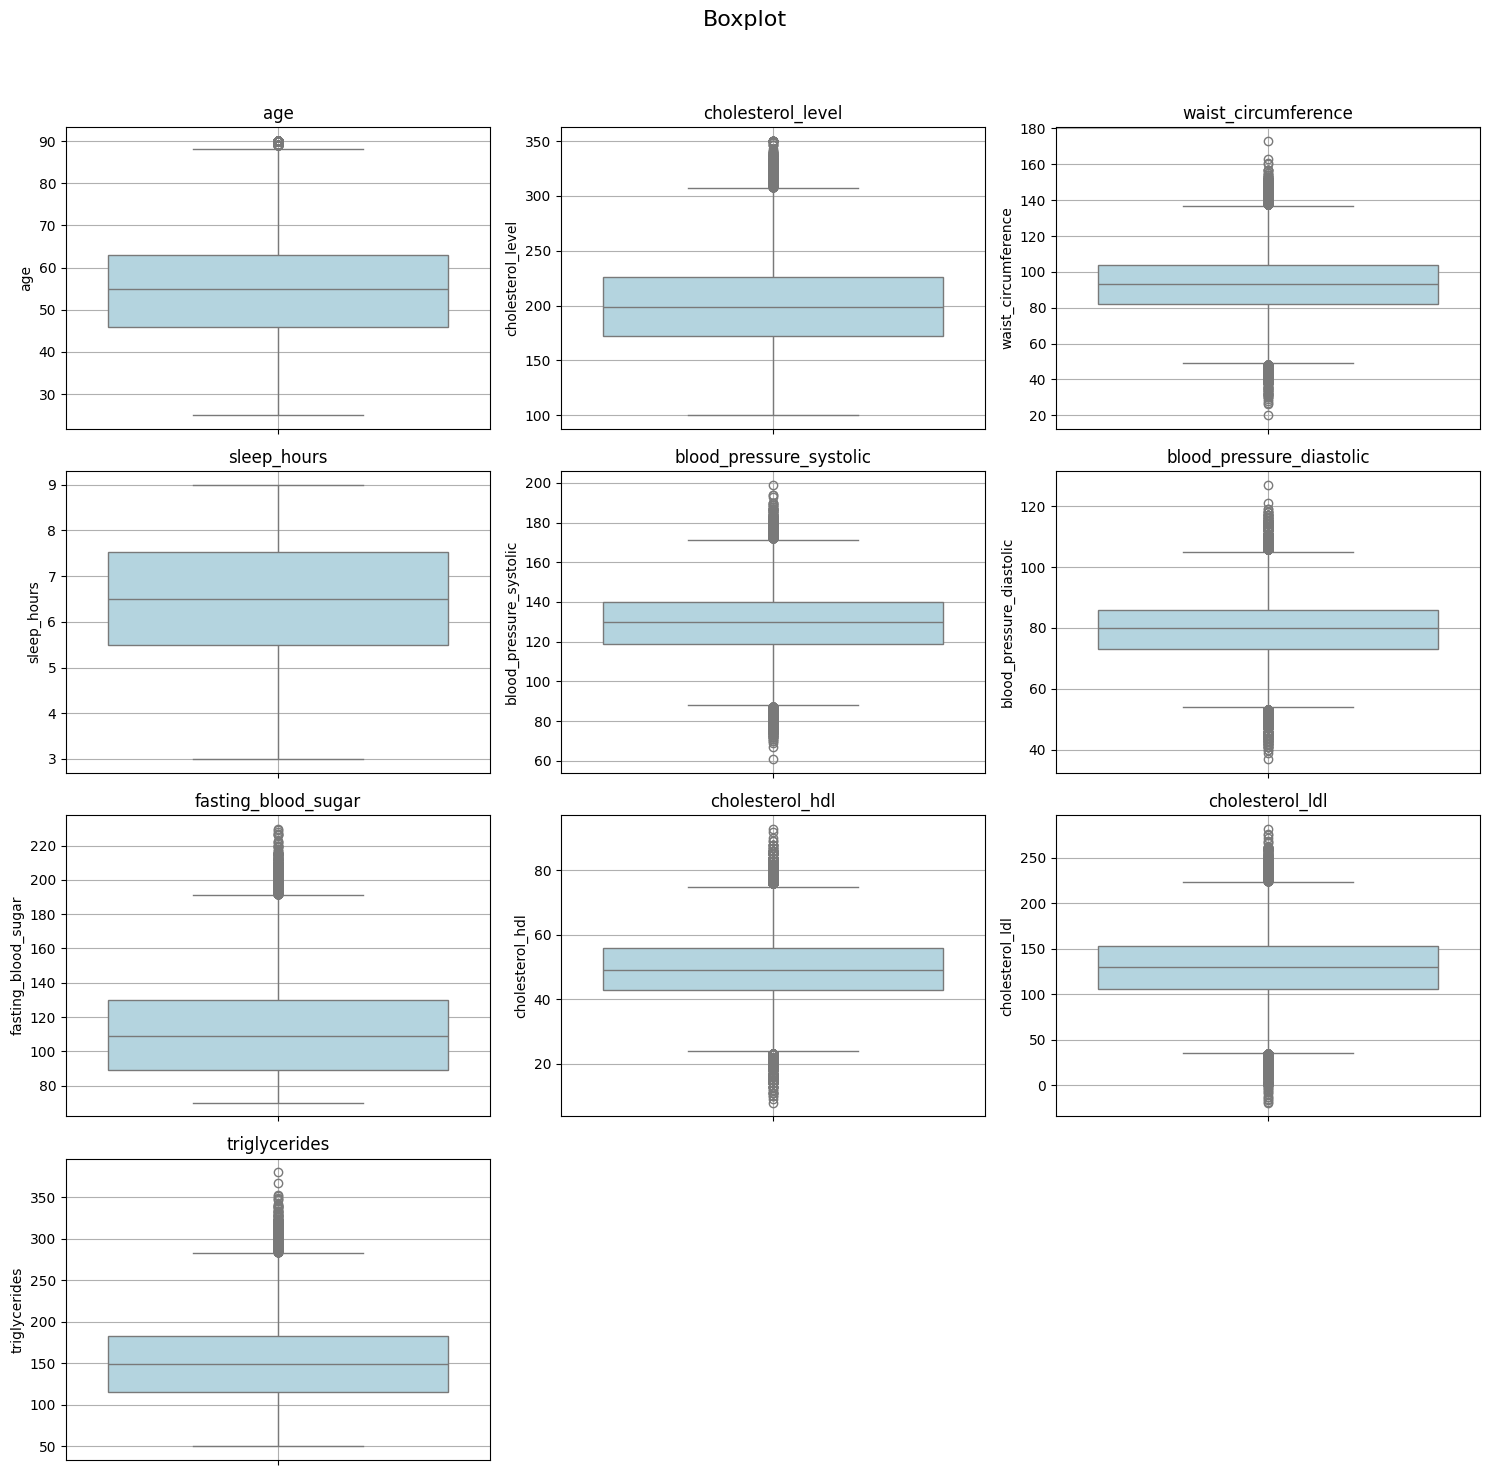

In [15]:
# Creating a figure and a 4x3 grid of subplots for boxplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.suptitle("Boxplot", fontsize=16)  # Setting the title of the whole figure

# Flattening the 2D axes array into a 1D array to easily access each subplot
axes = axes.flatten()

# Looping through each continuous column to create boxplots
for i, column in enumerate(continous_columns):
    sns.boxplot(y=dataset_cleaned[column], ax=axes[i], color='lightblue')  # Creating a boxplot for each continuous column
    axes[i].set_title(column)  # Setting the title for each subplot
    axes[i].set_xlabel("")  # Removing the x-axis label for a cleaner look
    axes[i].grid(True)  # Enabling the grid on each subplot

# Removing any extra axes if there are more subplots than continuous columns
for j in range(len(continous_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjusting the layout to ensure the title fits properly and everything looks good
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Displaying the boxplots
plt.show()



In [16]:

# Creating a dictionary to store the IQR bounds for each continuous column
iqr_bounds = {}

# Looping through each continuous column to calculate the IQR and bounds
for col in continous_columns:
    # Calculating the first quartile (Q1) and third quartile (Q3)
    Q1 = dataset_cleaned[col].quantile(0.25)
    Q3 = dataset_cleaned[col].quantile(0.75)

    # Calculating the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculating the lower and upper bounds for outliers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Storing the bounds in the dictionary
    iqr_bounds[col] = (lower, upper)

# Displaying the IQR bounds for each continuous column
iqr_bounds


{'age': (np.float64(20.5), np.float64(88.5)),
 'cholesterol_level': (np.float64(91.0), np.float64(307.0)),
 'waist_circumference': (np.float64(49.0), np.float64(137.0)),
 'sleep_hours': (np.float64(2.4515020686841114),
  np.float64(10.562122154303264)),
 'blood_pressure_systolic': (np.float64(87.5), np.float64(171.5)),
 'blood_pressure_diastolic': (np.float64(53.5), np.float64(105.5)),
 'fasting_blood_sugar': (np.float64(27.5), np.float64(191.5)),
 'cholesterol_hdl': (np.float64(23.5), np.float64(75.5)),
 'cholesterol_ldl': (np.float64(35.5), np.float64(223.5)),
 'triglycerides': (np.float64(15.5), np.float64(283.5))}

In [17]:
# Creating a dictionary to store the count of outliers for each continuous column
sum_outliers = {}

# Looping through each column and its IQR bounds to detect and count outliers
for col, (low, high) in iqr_bounds.items():
    # Creating a mask to identify outliers in the dataset (values outside the IQR bounds)
    outlier_mask = (dataset_cleaned[col] < low) | (dataset_cleaned[col] > high)

    # Storing the number of outliers in the dictionary
    sum_outliers[col] = outlier_mask.sum()

# Displaying the count of outliers for each continuous column
sum_outliers



{'age': np.int64(340),
 'cholesterol_level': np.int64(518),
 'waist_circumference': np.int64(1035),
 'sleep_hours': np.int64(0),
 'blood_pressure_systolic': np.int64(810),
 'blood_pressure_diastolic': np.int64(1488),
 'fasting_blood_sugar': np.int64(534),
 'cholesterol_hdl': np.int64(1445),
 'cholesterol_ldl': np.int64(1109),
 'triglycerides': np.int64(569)}

It can be seen that almost all attributes have outlier values. Then the outlier values will be removed. The reason for removing the outlier values is because the amount of data is so large that it will not have a significant effect if the outlier values are removed.

In [18]:
# Removing rows with outliers based on the IQR bounds for each continuous column
for col, (low, high) in iqr_bounds.items():
    # Filtering the dataset to keep only the rows where the values are within the IQR bounds
    dataset_cleaned = dataset_cleaned[~((dataset_cleaned[col] < low) | (dataset_cleaned[col] > high))]

# Displaying the updated dataset_cleaned information (after removing outliers)
dataset_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 150674 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             150674 non-null  int64  
 1   gender                          150674 non-null  object 
 2   region                          150674 non-null  object 
 3   income_level                    150674 non-null  object 
 4   hypertension                    150674 non-null  int64  
 5   diabetes                        150674 non-null  int64  
 6   cholesterol_level               150674 non-null  int64  
 7   obesity                         150674 non-null  int64  
 8   waist_circumference             150674 non-null  int64  
 9   family_history                  150674 non-null  int64  
 10  smoking_status                  150674 non-null  object 
 11  alcohol_consumption             150674 non-null  object 
 12  physical_activity    

# Visualization

In the visualization stage, the distribution patterns and relationships between variables in the dataset are explored to gain a deeper understanding before entering the modeling stage. For numerical features, visualizations such as histograms and KDE plots were used to see the shape of the data distribution, detect the presence of skewness, and visually observe the distribution and presence of outliers. In addition, correlations between numerical features were visualized using violin plots that combine the relationship between numerical features and binary target variables. For categorical features, barplots and chi-square test visualizations were used to evaluate the relationship between categories and targets. These visualizations not only help in understanding the structure and characteristics of the data, but also serve as a foundation in the feature selection process and the selection of appropriate transformation or encoding techniques in the next preprocessing stage.

##Distribution

In the distribution visualization stage, the main focus is to understand the distribution pattern of the values of each feature, especially numeric features, in order to identify characteristics such as symmetry, skewness and potential transformations needed. Visualization is done using histograms to see the frequency of values, and Kernel Density Estimation (KDE) plots to observe the shape of the distribution more finely. Through this process, a deeper understanding of the shape of the data distribution is obtained, which is useful in selecting the appropriate statistical method or machine learning model at a later stage.

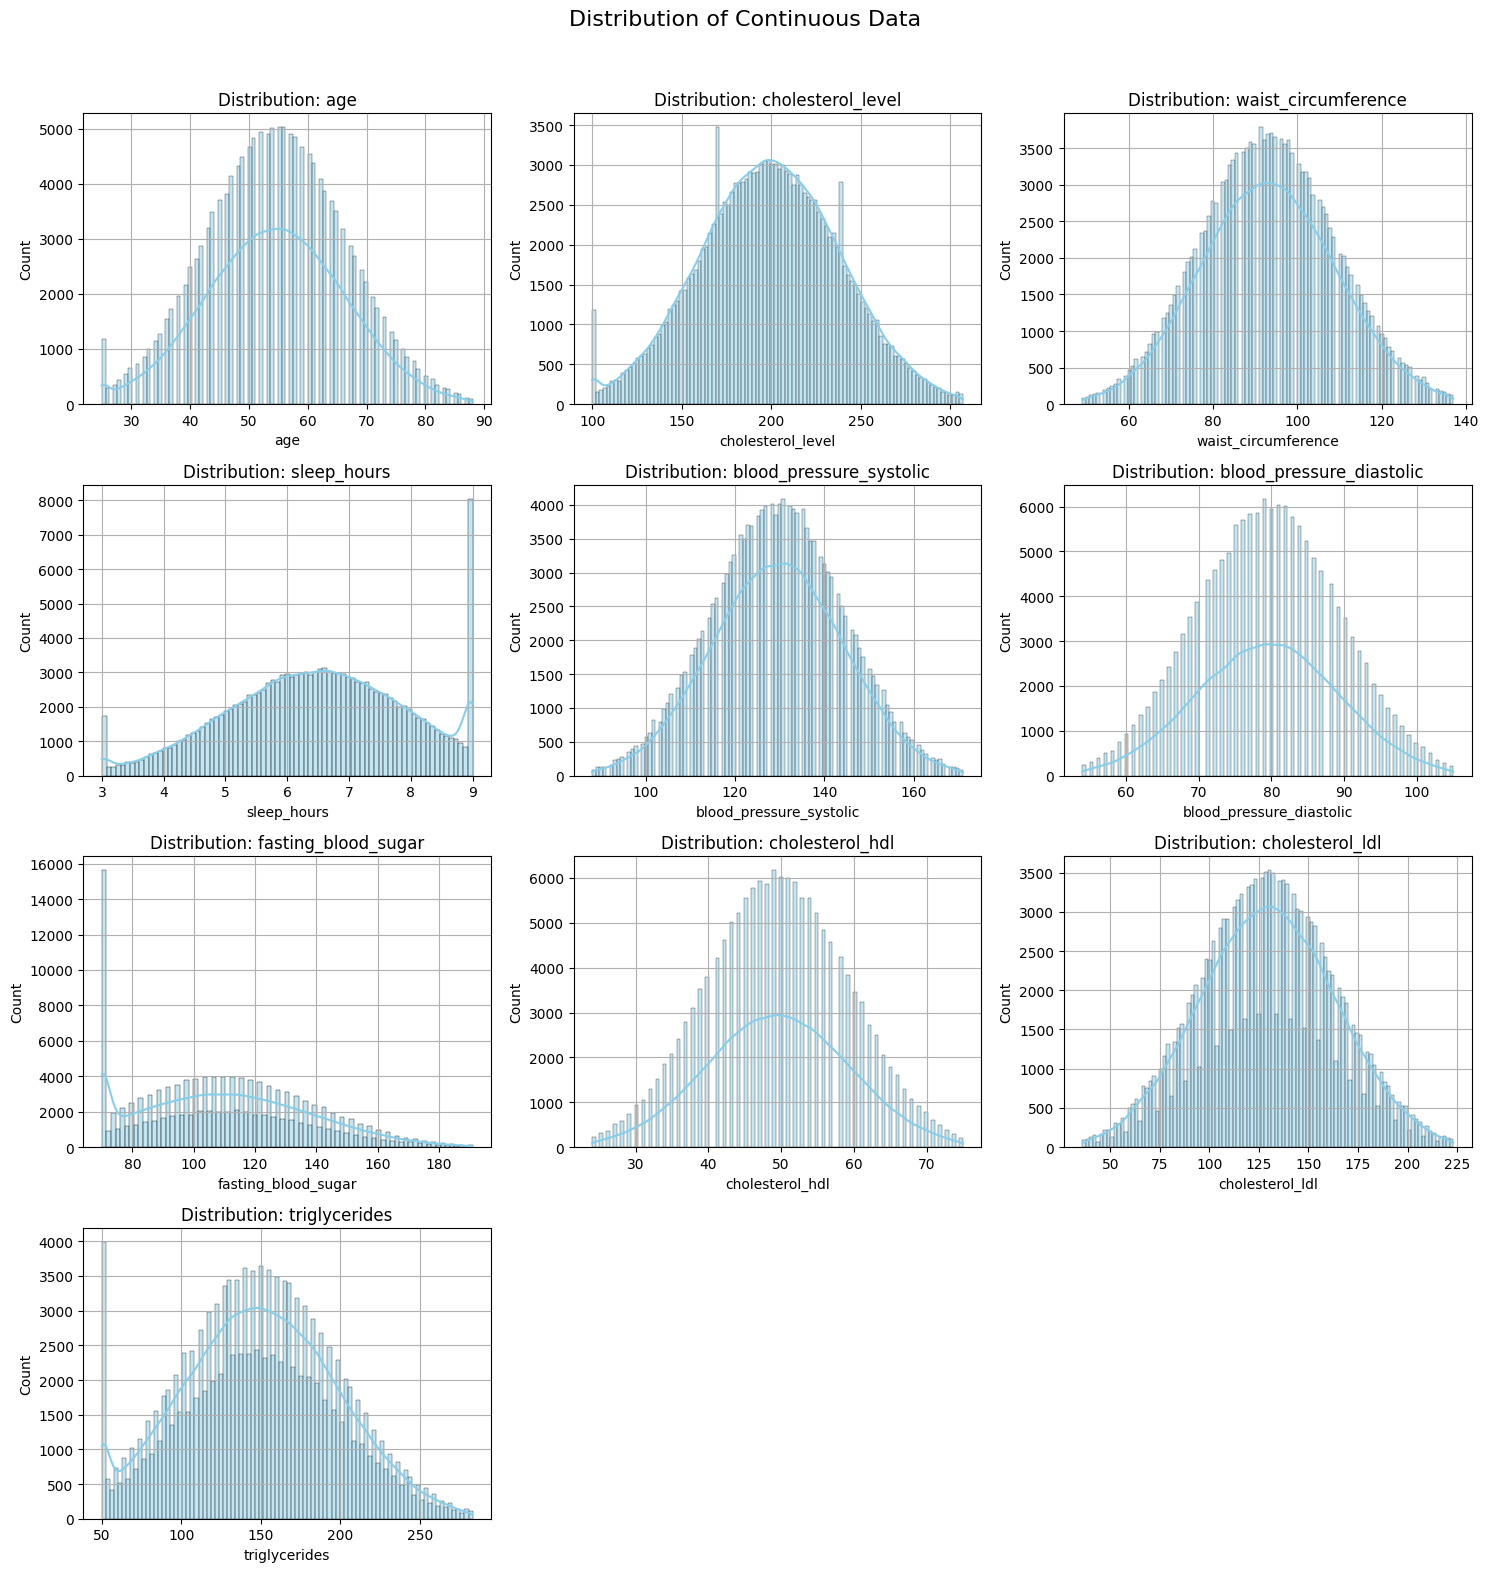

In [19]:
# Defining the number of columns for the subplot grid
n_cols = 3

# Calculating the required number of rows based on the number of continuous columns
n_rows = math.ceil(len(continous_columns) / n_cols)

# Creating a grid of subplots with the appropriate number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flattening the 2D array of axes into a 1D array for easier access

# Looping through each continuous column to plot its distribution
for i, col in enumerate(continous_columns):
    # Creating a histogram with KDE (Kernel Density Estimation) on each subplot
    sns.histplot(data=dataset_cleaned, x=col, ax=axes[i], color='skyblue', edgecolor='black', kde=True)
    axes[i].set_title(f'Distribution: {col}', fontsize=12)  # Setting the title for each subplot
    axes[i].grid(True)  # Enabling the grid for each subplot

# Removing extra subplots if there are more axes than continuous columns
for j in range(len(continous_columns), len(axes)):
    fig.delaxes(axes[j])

# Setting the title for the whole figure
fig.suptitle('Distribution of Continuous Data', fontsize=16)

# Adjusting layout to ensure everything fits properly
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Displaying the plot
plt.show()


It can be seen that almost all value distributions belonging to the continuous column are normal distributions. Only two columns are skewed, namely the ‘sleep_hours’ and ‘fasting_blood_sugar’ columns. These columns will be processed further in the feature engineering stage.

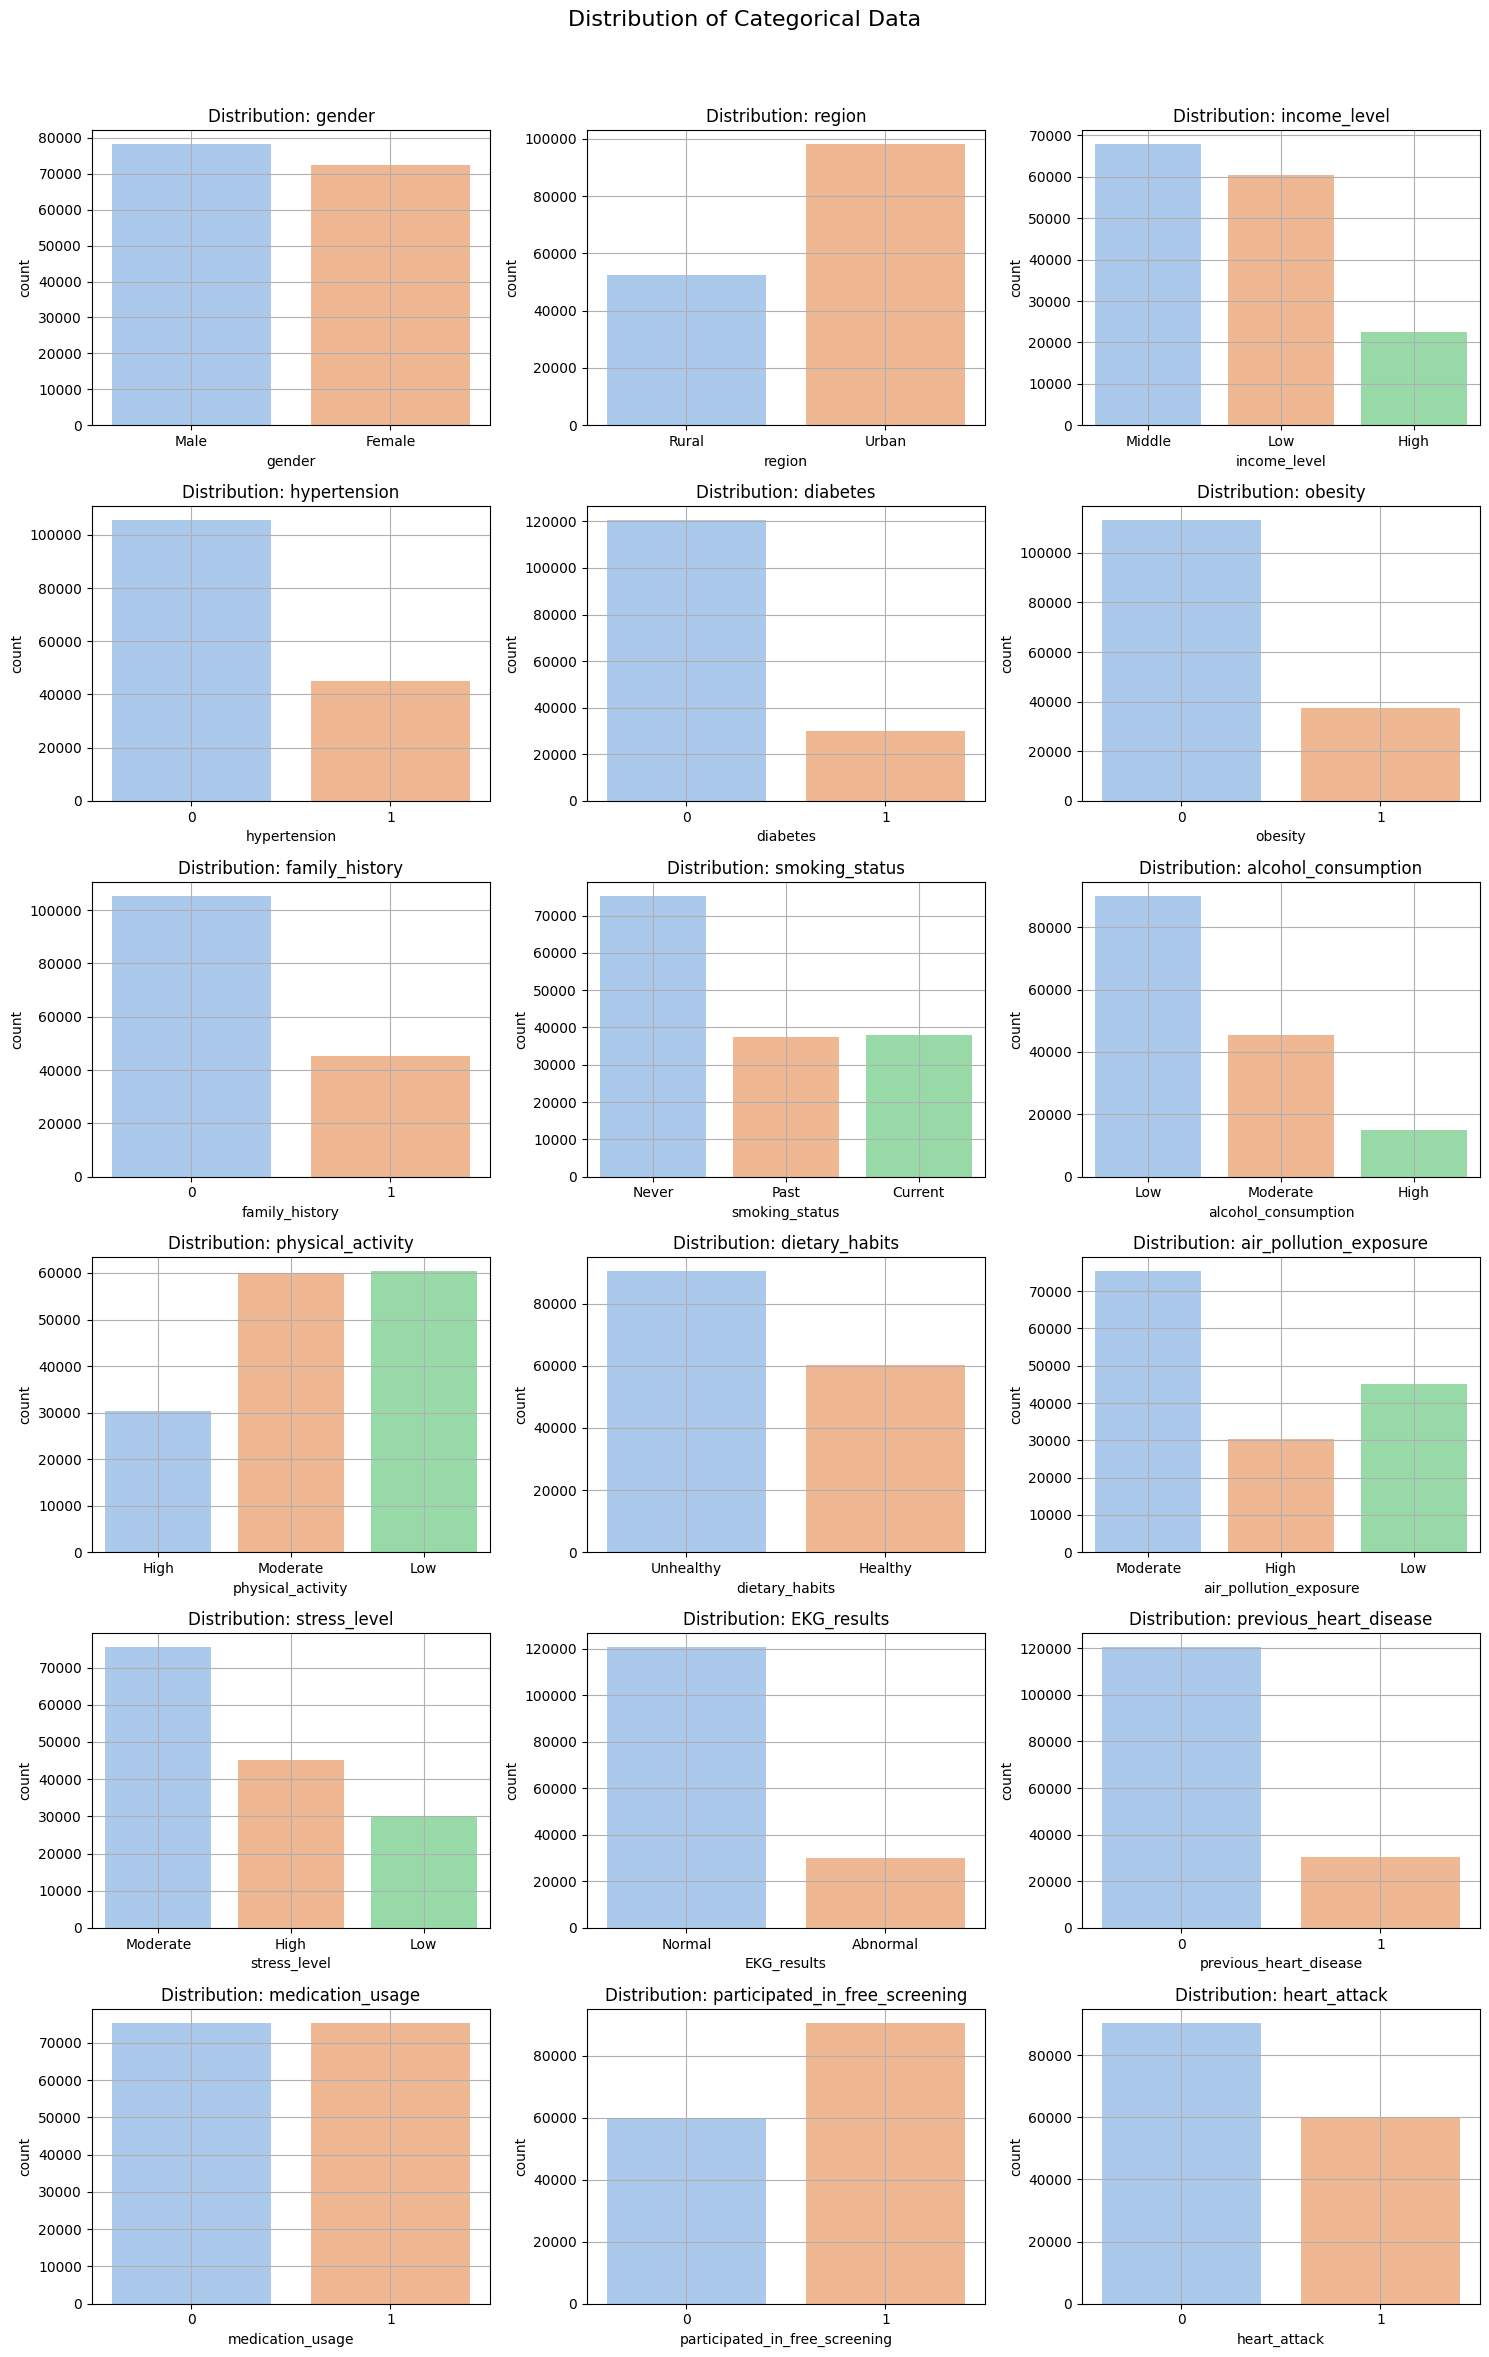

In [20]:

# Defining the number of columns for the subplot grid
n_cols = 3

# Calculating the required number of rows based on the number of categorical columns
n_rows = math.ceil(len(categorical_columns) / n_cols)

# Creating a grid of subplots with the appropriate number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flattening the 2D array of axes into a 1D array for easier access

# Looping through each categorical column to plot its distribution
for i, col in enumerate(categorical_columns):
    # Creating a count plot to show the distribution of categories
    sns.countplot(data=dataset_cleaned, x=col, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Distribution: {col}', fontsize=12)  # Setting the title for each subplot
    axes[i].grid(True)  # Enabling the grid for each subplot

# Removing extra subplots if there are more axes than categorical columns
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Setting the title for the whole figure
fig.suptitle('Distribution of Categorical Data', fontsize=16)

# Adjusting layout to ensure everything fits properly
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Displaying the plot
plt.show()



##Correlation


In the correlation analysis stage, the relationship between variables in the dataset is evaluated, both between numerical features and between features and target variables. Numerical features are correlated with binary target variables, using the point-biserial correlation approach, which provides a coefficient value (r) and p-value to measure the strength and significance of the relationship. As for categorical features, the chi-square test was used to measure the association with the target, and the results were visualized in the form of a barplot grid with the chi-square value as an indicator of the strength of the association. Through this analysis, features that have a strong and significant relationship with the target can be identified as important candidates for the next stage of modeling.

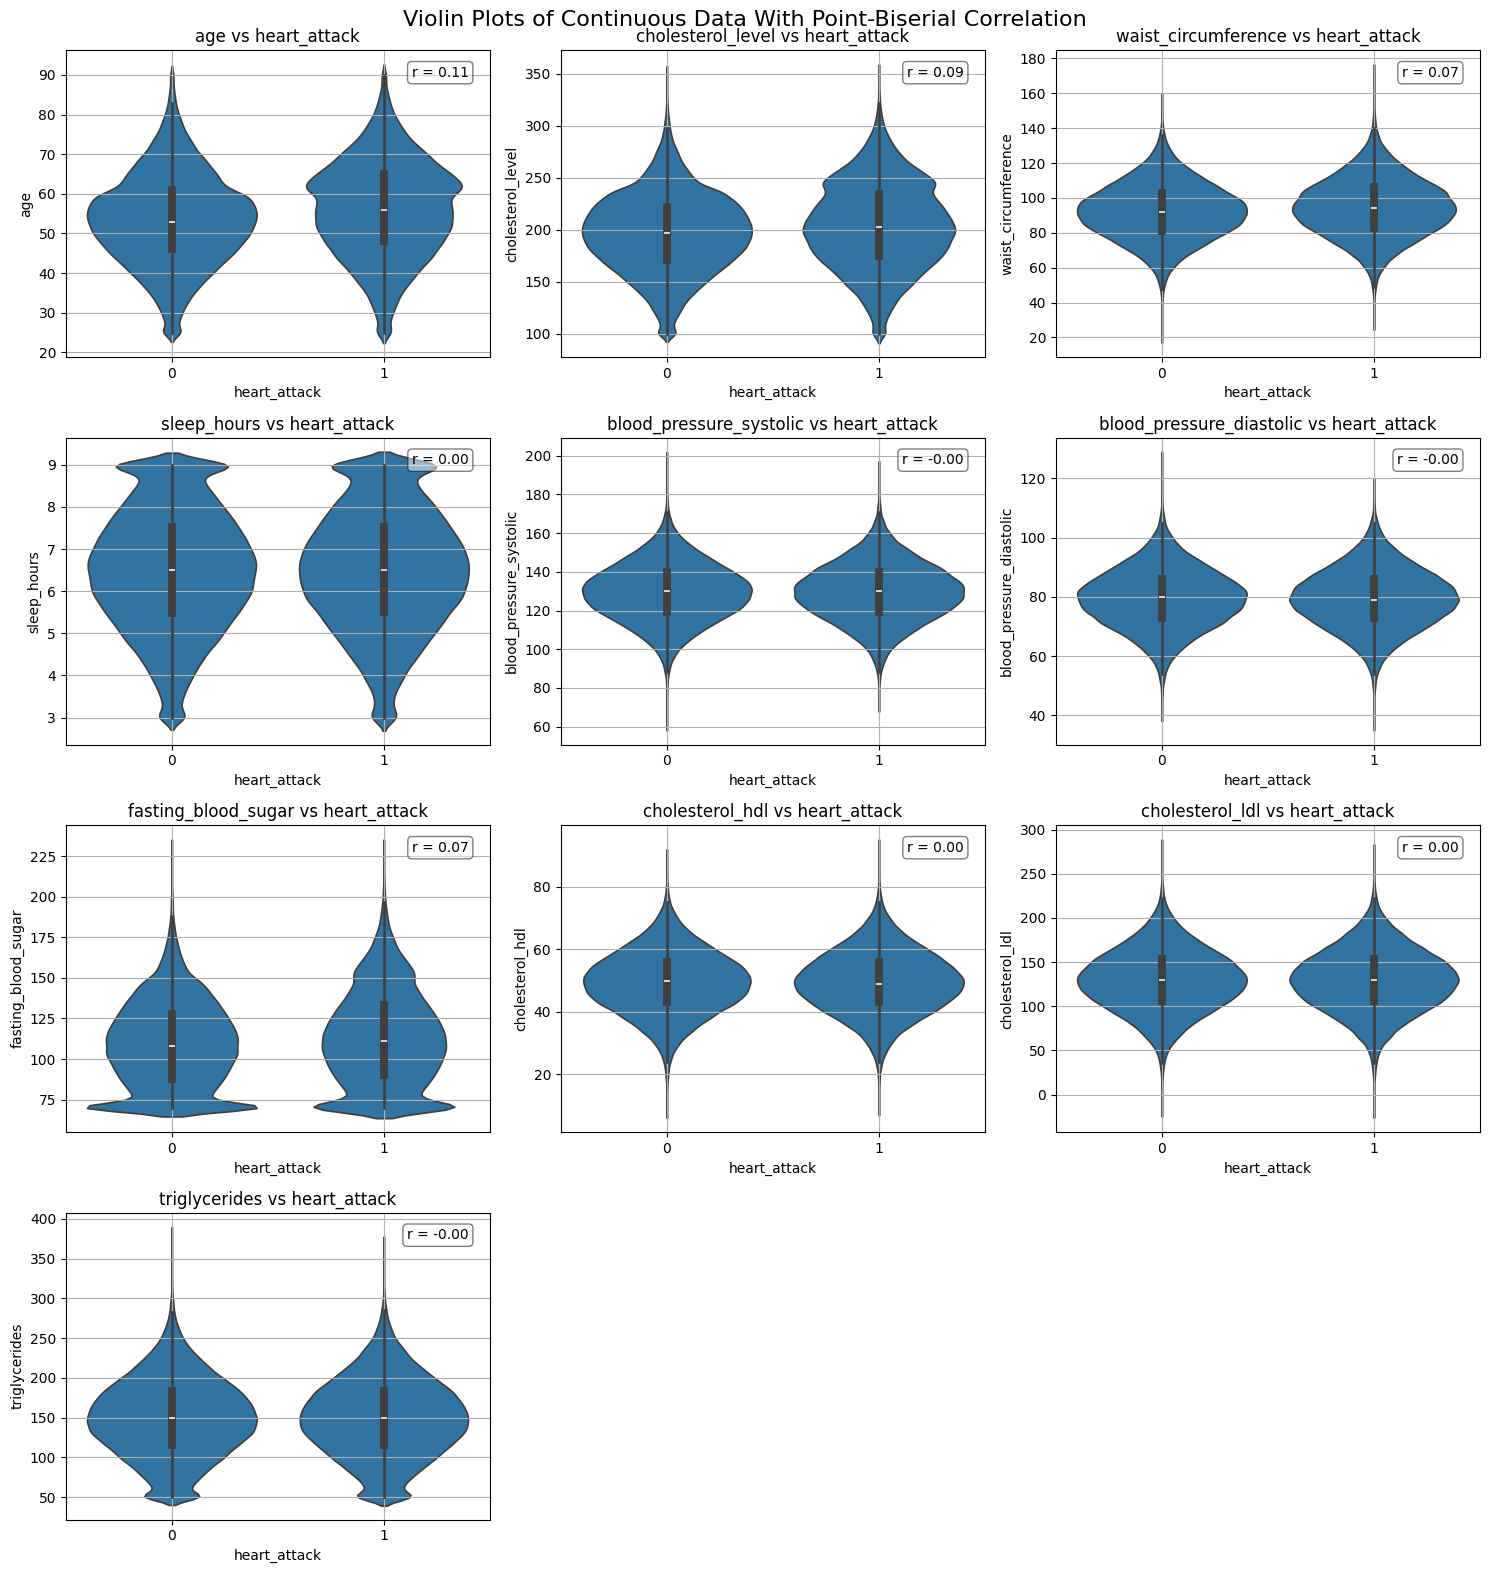

In [21]:
# Defining the target column for the comparison
target_col = 'heart_attack'

# Defining the number of columns for the subplot grid
n_cols = 3

# Calculating the required number of rows based on the number of continuous columns
n_rows = math.ceil(len(continous_columns) / n_cols)

# Creating a grid of subplots with the appropriate number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flattening the 2D array of axes into a 1D array for easier access

# Looping through each continuous column to plot the violin plots
for i, col in enumerate(continous_columns):
    # Creating a violin plot for the relationship between each continuous column and 'heart_attack'
    sns.violinplot(data=dataset, x=target_col, y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs heart_attack')  # Setting the title for each subplot
    axes[i].grid(True)  # Enabling the grid for each subplot

    # Calculating the Point-Biserial Correlation between the continuous column and the target variable
    r, p = pointbiserialr(dataset[col], dataset[target_col])

    # Creating a text box to display the correlation value (r) and p-value
    textstr = f"r = {r:.2f}"
    axes[i].text(0.95, 0.95, textstr,
                 transform=axes[i].transAxes,
                 fontsize=10, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

# Removing extra subplots if there are more axes than continuous columns
for j in range(len(continous_columns), len(axes)):
    fig.delaxes(axes[j])

# Setting the title for the whole figure
plt.suptitle('Violin Plots of Continuous Data With Point-Biserial Correlation', fontsize=16)

# Adjusting layout to ensure everything fits properly
plt.tight_layout()

# Displaying the plot
plt.show()


It can be seen that the correlation values between the numeric (continuous) column and the target column ‘heart_attack’ all have very low values. Therefore, I will take values that are not 0. I chose to retain all features that had Point-Biserial Correlation values different from zero, even if they were very small. This was done to avoid discarding information that may still be useful to the model, especially in scenarios where the relationships between variables are complex and not always indicated by high correlations. This approach also preserves the opportunity for further feature exploration using non-linear models. The columns ‘age’, ‘cholesterol_level’, ‘waist_circumference’, and ‘fasting_blood_sugar’ will be selected for further machine learning process.

The reason for choosing Point-Biserial is because it treats binary targets as specialized numerics, and is able to capture the correlation between the distribution of numerical features over two class groups.

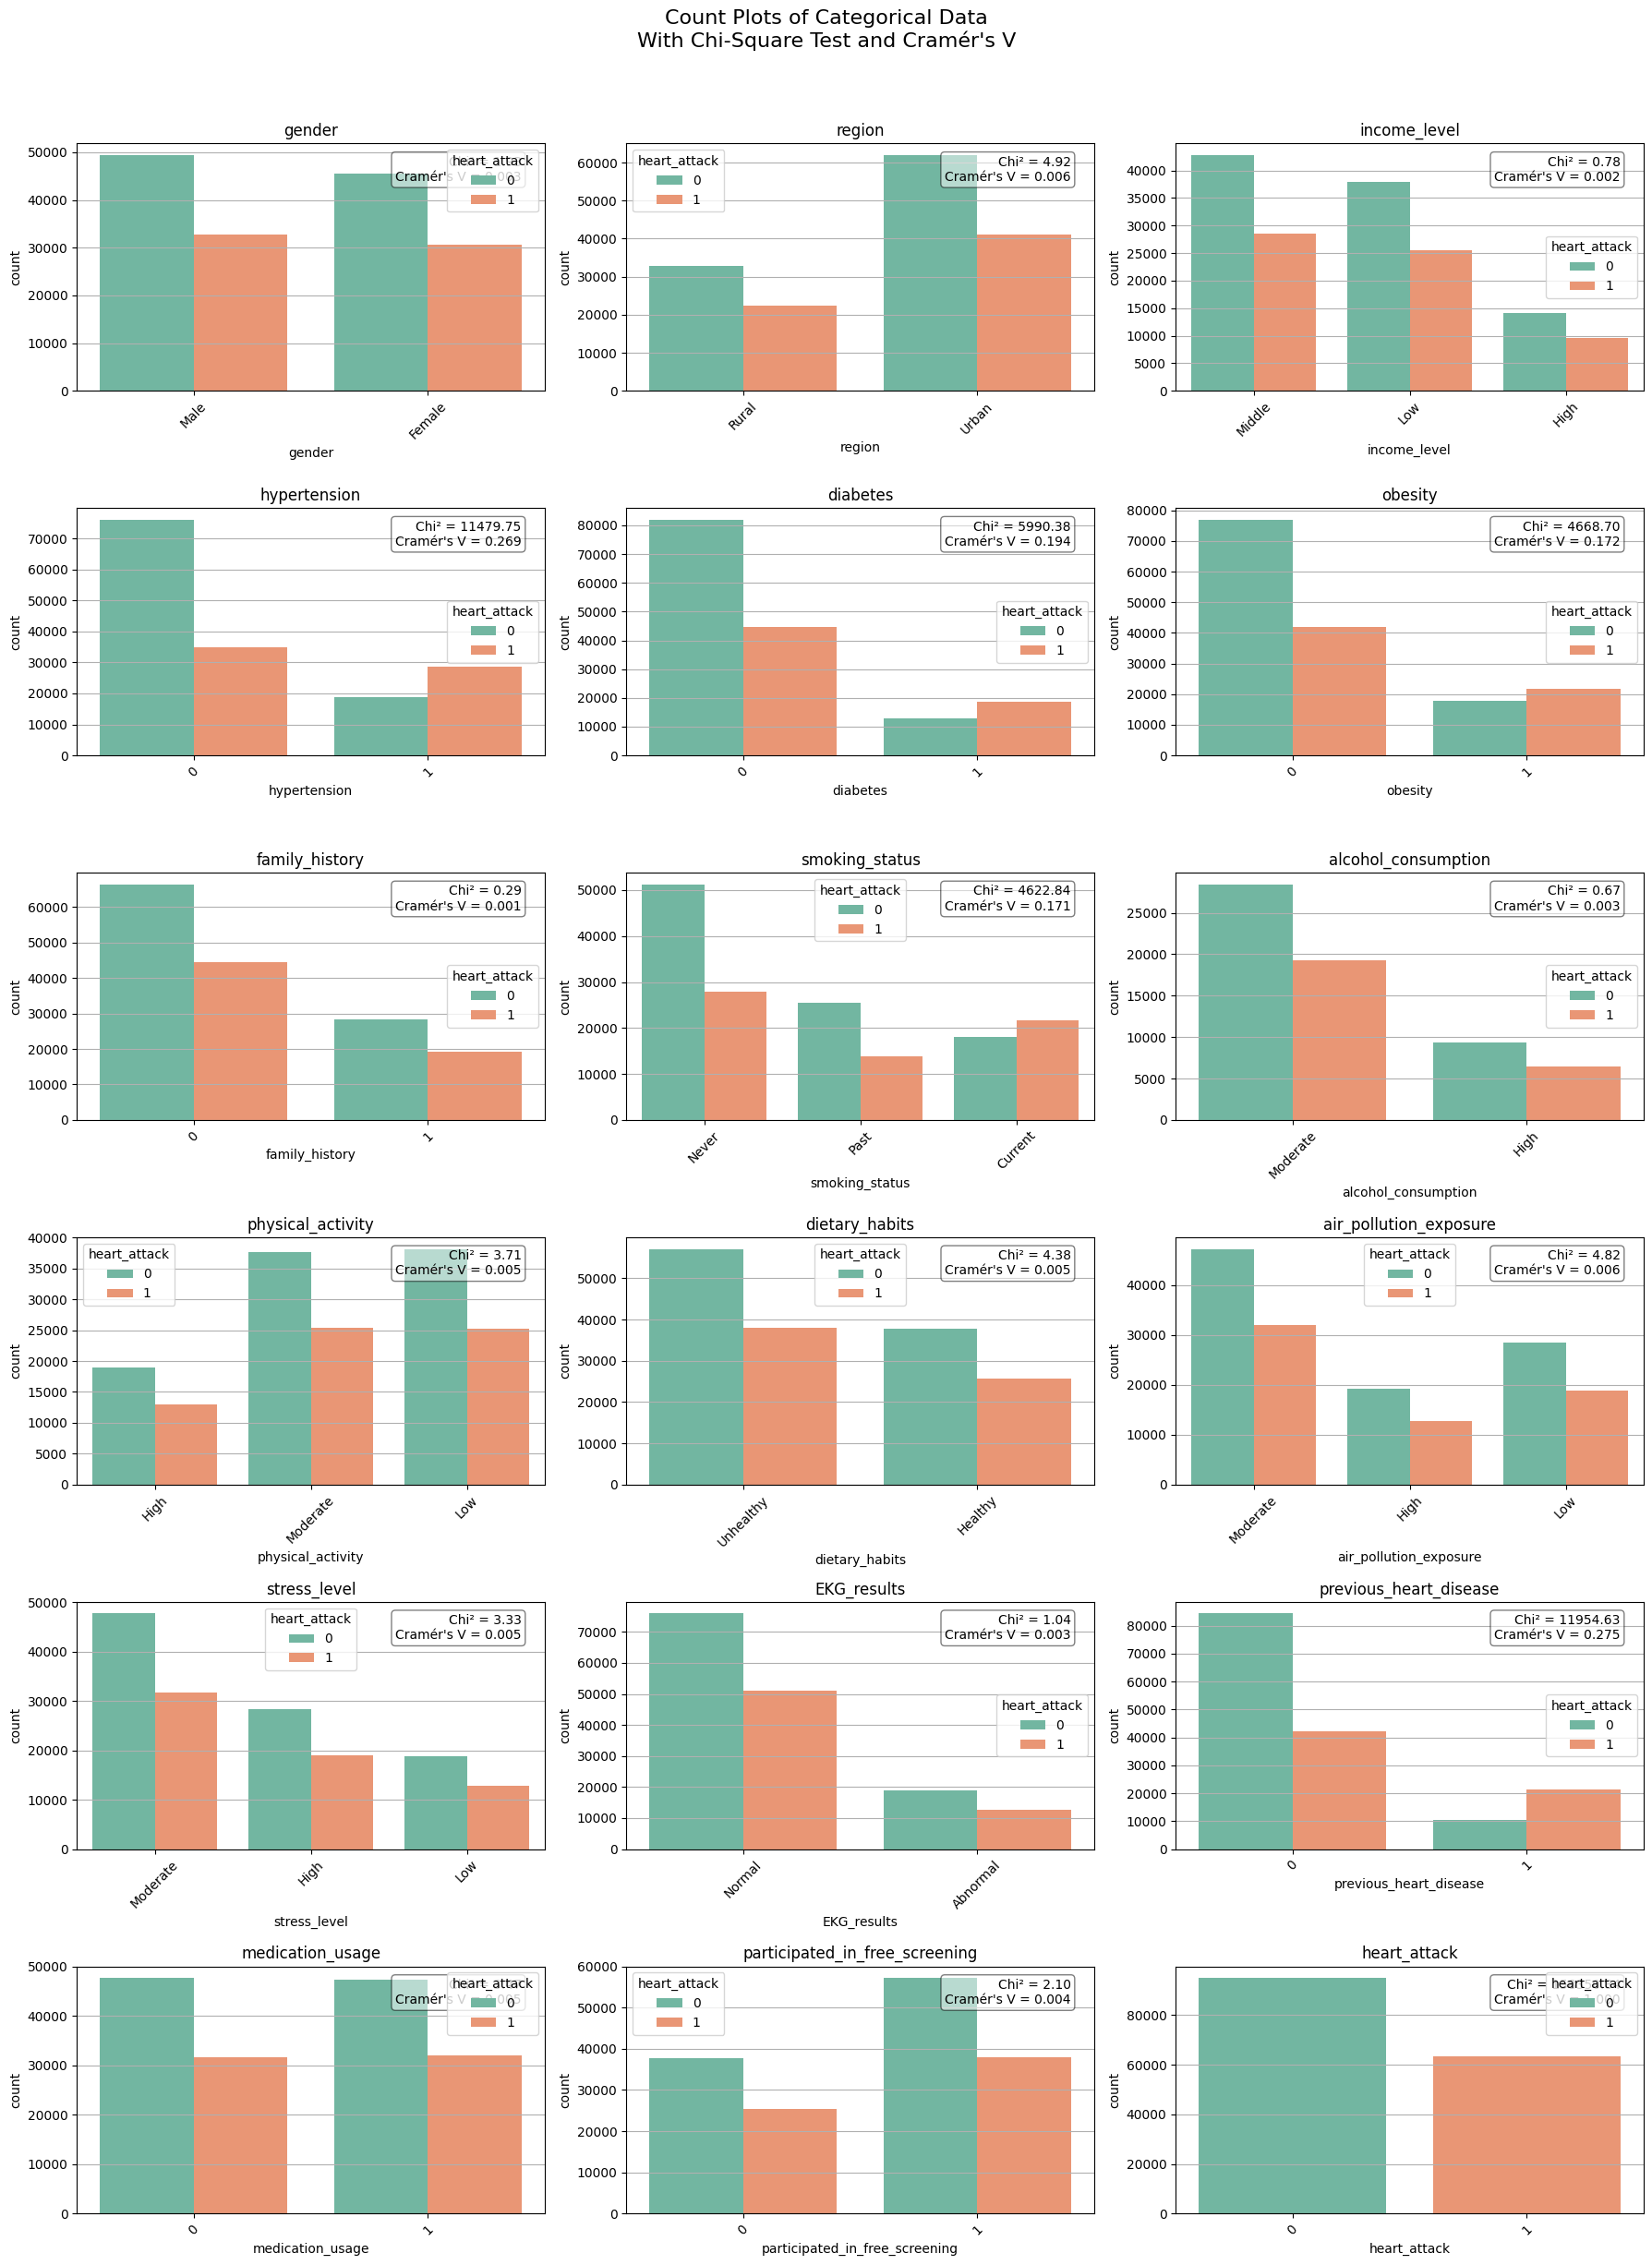

In [22]:
# Defining a function to calculate Cramér's V from a contingency table
def cramers_v(confusion_matrix):
    # Performing the Chi-Square test on the contingency table
    chi2, _, _, _ = chi2_contingency(confusion_matrix)

    # Total number of observations in the contingency table
    n = confusion_matrix.sum().sum()

    # Calculating phi² (effect size)
    phi2 = chi2 / n

    # Dimensions of the contingency table (rows and columns)
    r, k = confusion_matrix.shape

    # Calculating and returning Cramér's V statistic
    return np.sqrt(phi2 / min(k - 1, r - 1))


# Defining the number of columns for the subplot grid
n_cols = 3

# Calculating the required number of rows based on the number of categorical columns
n_rows = int(np.ceil(len(categorical_columns) / n_cols))

# Creating a grid of subplots with the appropriate number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Flattening the 2D array of axes into a 1D array for easier access

# Looping through each categorical column to plot the count plots
for i, col in enumerate(categorical_columns):

    # Creating a contingency table for the Chi-Square test
    contingency = pd.crosstab(dataset[col], dataset[target_col])

    # Performing the Chi-Square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency)

    # Calculating Cramér's V
    c = cramers_v(contingency)

    # Creating a count plot with hue representing the target variable
    sns.countplot(data=dataset, x=col, hue=target_col, ax=axes[i], palette='Set2')
    axes[i].tick_params(axis='x', rotation=45)  # Rotating x-axis labels for better readability
    axes[i].grid(True, axis='y')  # Enabling grid only on the y-axis
    axes[i].set_title(col)  # Setting the title for each subplot

    # Adding Chi-Square value, p-value, and Cramér's V as a text annotation on the plot
    textstr = f"Chi² = {chi2:.2f}\nCramér's V = {c:.3f}"
    axes[i].text(0.95, 0.95, textstr, transform=axes[i].transAxes,
                 fontsize=10, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

# Removing extra subplots if there are more axes than categorical columns
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Setting the title for the entire figure
plt.suptitle('Count Plots of Categorical Data\nWith Chi-Square Test and Cramér\'s V', fontsize=16, y=1.02)

# Adjusting layout to ensure everything fits properly
plt.tight_layout()

# Displaying the plot
plt.show()




It can be seen that the chi-squered values of each categorical column with the target column ‘heart_attack’ have varying values although they tend to be small. So, I will select columns with Cramér's V values greater than or equal to 0.1. I chose features with Cramér's V > 0.1 because in this dataset, none of the categorical variables had a strong relationship (Cramér's V ≥ 0.5) with the target. The 0.1 threshold provides a reasonable midpoint to retain features with weak to moderate influence, without sacrificing potential information in the feature selection process. So, the selected columns are ‘region’, ‘hypertension’, ‘diabetes’, ‘obesity’, ‘smoking status’, and ‘previous_heart_disease’.

#Feature Engineering

In this stage, feature selection is first performed, which is the process of selecting the features that are most relevant and influential to the target variable based on the results of previous analysis, such as correlation values, Cramér's V, or other statistical tests. The goal is to reduce the dimensionality of the data and eliminate redundant or uninformative features, thereby improving model performance and reducing the risk of overfitting. Next, one-hot encoding is performed on categorical features, which converts each unique category in a column into a binary representation (0 or 1) so that it can be processed by a numerical model. The last step is a log transformation on certain numerical features that have a skewed distribution, with the aim of bringing the distribution closer to normal. This transformation not only helps the model work more effectively, but can also dampen the effects of extreme outliers. Overall, the feature engineering stage serves to present the data in the most optimized form for model training.


## Feature Selection

Features were selected based on correlation results for numerical features (using Point-Biserial) and Chi-Square and Cramér's V tests for categorical features. Features with sufficient association strength (i.e. correlation or Cramér's V values above the threshold) were retained for use in the machine learning model.

In [23]:
final_dataset = dataset_cleaned.copy()

In [24]:
selected_columns = ['age', 'cholesterol_level', 'waist_circumference', 'fasting_blood_sugar',
                    'region', 'hypertension', 'diabetes', 'obesity',
                    'smoking_status', 'previous_heart_disease', 'heart_attack']

final_dataset = final_dataset[selected_columns]

final_dataset.head()

,age,cholesterol_level,waist_circumference,fasting_blood_sugar,region,hypertension,diabetes,obesity,smoking_status,previous_heart_disease,heart_attack
0,60,211,83,173,Rural,0,1,0,Never,0,0
1,53,208,106,70,Urban,0,0,0,Past,1,0
2,62,231,112,118,Urban,0,0,1,Past,0,1
3,73,202,82,98,Urban,1,0,0,Never,0,0
4,52,232,89,104,Urban,1,0,0,Current,1,1


## One-Hot Encoding

In this stage, the selected categorical features are transformed into numerical representations through a one-hot encoding process. The transformation is performed using pandas' pd.get_dummies() function, where each unique category in each feature is converted into a binary column. The encoding results were then recombined with the selected numeric features and target columns, so that all features in the dataset were in numeric format and ready to be used in the machine learning model training process.

In [25]:
final_dataset = pd.get_dummies(final_dataset, columns=['region', 'smoking_status'], drop_first=True)
final_dataset.head()

,age,cholesterol_level,waist_circumference,fasting_blood_sugar,hypertension,diabetes,obesity,previous_heart_disease,heart_attack,region_Urban,smoking_status_Never,smoking_status_Past
0,60,211,83,173,0,1,0,0,0,False,True,False
1,53,208,106,70,0,0,0,1,0,True,False,True
2,62,231,112,118,0,0,1,0,1,True,False,True
3,73,202,82,98,1,0,0,0,0,True,True,False
4,52,232,89,104,1,0,0,1,1,True,False,False


In [26]:
final_dataset = final_dataset.astype(int)
final_dataset.head()

,age,cholesterol_level,waist_circumference,fasting_blood_sugar,hypertension,diabetes,obesity,previous_heart_disease,heart_attack,region_Urban,smoking_status_Never,smoking_status_Past
0,60,211,83,173,0,1,0,0,0,0,1,0
1,53,208,106,70,0,0,0,1,0,1,0,1
2,62,231,112,118,0,0,1,0,1,1,0,1
3,73,202,82,98,1,0,0,0,0,1,1,0
4,52,232,89,104,1,0,0,1,1,1,0,0


## Log Transformation

At this stage, logarithmic transformation is applied to numerical features that exhibit non-normal distribution or have high skewness. The purpose of this process is to stabilize the variance, reduce the influence of outliers, and bring the shape of the distribution closer to a normal distribution. Before the transformation, zero or negative values are adjusted by adding a small constant so that logarithms can be applied. Once the transformation is applied, the log-transformed features can be used in modeling with better distribution assumptions.

In [27]:
final_dataset['fasting_blood_sugar'] = np.log1p(final_dataset['fasting_blood_sugar'])


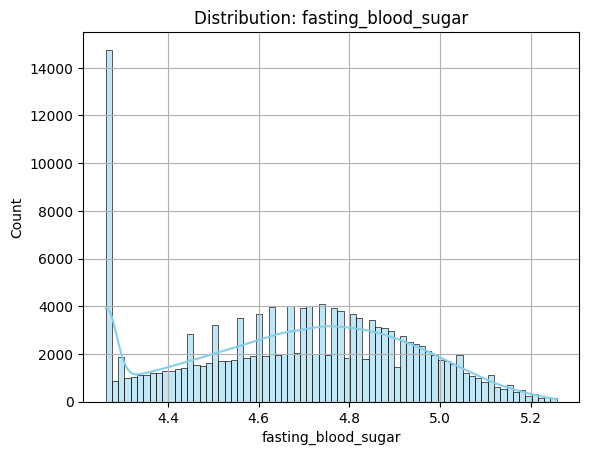

In [28]:

sns.histplot(data=final_dataset, x=final_dataset['fasting_blood_sugar'], color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution: fasting_blood_sugar')
plt.grid(True)
plt.show()

#Hyphothesis Testing

In the hypothesis testing stage, statistical testing is performed on each feature in the dataset to determine whether there is a significant relationship between these features and the target variable. This process involves formulating a null hypothesis (H₀) stating that there is no relationship between the feature and the target, and an alternative hypothesis (H₁) stating the opposite. The p-value of each test is used as the basis for the decision, where features with a p-value below a threshold (e.g. 0.05) are considered significant and potentially retained in the subsequent modeling process. Thus, features that have a statistical contribution to the target can be objectively identified.

This hypothesis test aims to add new attributes that did not pass the correlation selection in the previous stage.

## Sleep Hours

To understand the relationship between sleep duration and heart disease risk, hypotheses were tested using a one-way independent t-test approach. The null hypothesis (H₀) states that the average hours of sleep of people with heart disease is greater or equal to those without heart disease. Conversely, the alternative hypothesis (H₁) states that the average hours of sleep of people with heart disease is lower, which means that people with less sleep tend to have a higher risk of developing heart disease.


  - H₀ = average hours of sleep of people with heart disease is greater or equal to those without heart disease

  - H₁ = average hours of sleep of people with heart disease is lower to those without heart disease


After the statistical test, a one-way t-statistic and p-value are obtained to determine the significance of the difference. If the p-value is less than the significance level (e.g. 0.05), then H₀ is rejected, indicating that sleeping less is significantly associated with an increased risk of heart attack.

In [29]:
# Separate groups based on the target variable
sleep_heartattack = dataset_cleaned[dataset_cleaned['heart_attack'] == 1]['sleep_hours']
sleep_no_heartattack = dataset_cleaned[dataset_cleaned['heart_attack'] == 0]['sleep_hours']

# Check if both groups have enough samples
if len(sleep_heartattack) > 2 and len(sleep_no_heartattack) > 2:
    # Perform independent t-test
    t_stat, p_two_tail = ttest_ind(sleep_heartattack, sleep_no_heartattack, equal_var=False)
    p_one_tail = p_two_tail / 2 if t_stat < 0 else 1 - (p_two_tail / 2)

    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value (one-tailed): {p_one_tail:.4f}")

    # Interpret result
    alpha = 0.05
    if p_one_tail < alpha:
        print("Reject H₀: People with heart attacks tend to sleep less.")
    else:
        print("Fail to reject H₀: No significant evidence that sleep duration is lower among those with heart attacks.")

    show_plot = True  # Flag to show plot
else:
    print("Not enough data in one or both groups to perform hypothesis testing.")
    show_plot = False


T-statistic: 0.4231
P-value (one-tailed): 0.6639
Fail to reject H₀: No significant evidence that sleep duration is lower among those with heart attacks.


To reinforce these findings, a boxplot visualization was used to show the difference in sleep distribution between the two groups (affected vs. unaffected). The boxplot clarifies the position of the median, the distribution of the data, as well as potential outliers within each group.

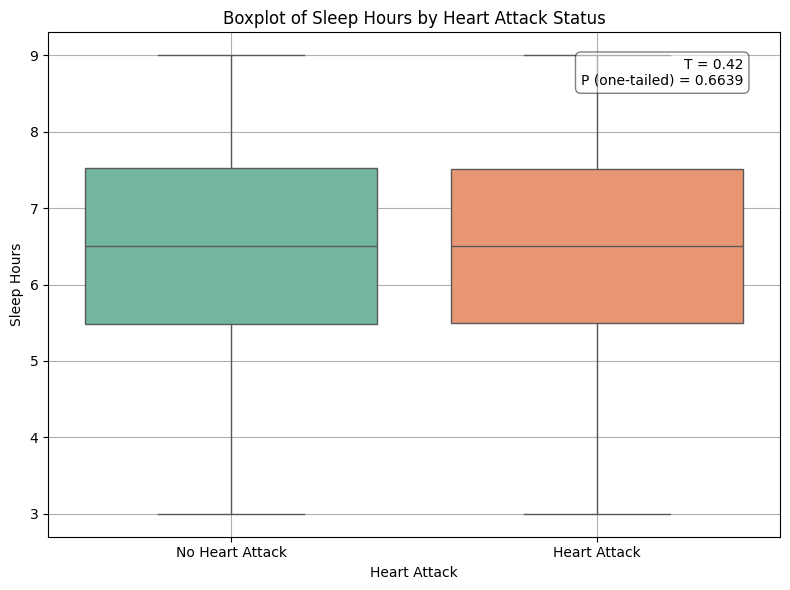

In [30]:
if show_plot:
    # Create boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dataset, x='heart_attack', y='sleep_hours', palette='Set2')
    plt.title('Boxplot of Sleep Hours by Heart Attack Status')
    plt.xticks([0, 1], ['No Heart Attack', 'Heart Attack'])
    plt.xlabel('Heart Attack')
    plt.ylabel('Sleep Hours')

    # Annotate with test result
    textstr = f"T = {t_stat:.2f}\nP (one-tailed) = {p_one_tail:.4f}"
    plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.5))

    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Income Level

To investigate the relationship between the categorical variable income_level and the binary target heart_attack, a Chi-Square test of independence was conducted. A contingency table was first constructed to represent the frequency distribution of the combinations of income levels and heart attack outcomes.

The test was performed under the following hypotheses:

  - Null Hypothesis (H₀): No significant association exists between income level and heart attack.

  - Alternative Hypothesis (H₁): A significant association exists between income level and heart attack.

A significance level (α) of 0.05 was chosen for the test. The Chi-Square statistic, degrees of freedom, and p-value were calculated using scipy.stats.chi2_contingency(). Additionally, Cramér’s V was computed to measure the strength of association.

The decision to reject or fail to reject the null hypothesis was based on the resulting p-value:

  - If the p-value was found to be less than 0.05, the null hypothesis was rejected, suggesting a significant association.

  - If the p-value exceeded 0.05, the null hypothesis was not rejected, indicating no statistically significant relationship.

In [31]:
# Create a contingency table
contingency_table = pd.crosstab(dataset_cleaned['income_level'], dataset_cleaned['heart_attack'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér’s V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Step 4: Decision based on p-value
alpha = 0.05
if p < alpha:
    result = "Reject H₀: There is a significant association between income level and heart attack."
else:
    result = "Fail to reject H₀: No significant association between income level and heart attack."

#Print results
print("Chi-Square Statistic:", round(chi2, 2))
print("Degrees of Freedom:", dof)
print("P-Value:", round(p, 4))
print("Cramér’s V:", round(cramers_v, 3))
print(result)


Chi-Square Statistic: 0.77
Degrees of Freedom: 2
P-Value: 0.679
Cramér’s V: 0.002
Fail to reject H₀: No significant association between income level and heart attack.


To aid interpretation, a count plot was generated using Seaborn to visually present the distribution of heart attack cases across income levels. The Chi-Square test results, including the test statistic, p-value, and Cramér’s V, were annotated on the plot.

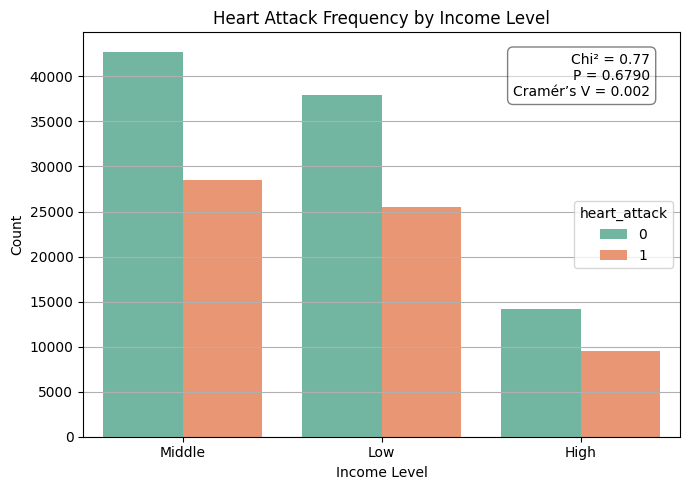

In [32]:
# Visualization
plt.figure(figsize=(7, 5))
sns.countplot(data=dataset, x='income_level', hue='heart_attack', palette='Set2')
plt.title('Heart Attack Frequency by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.grid(True, axis='y')

# Annotate with test results
textstr = f"Chi² = {chi2:.2f}\nP = {p:.4f}\nCramér’s V = {cramers_v:.3f}"
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

To investigate the relationship between the categorical variable physical_activity and the binary target variable heart_attack, a logistic regression model was employed. The variable physical_activity, which includes three levels (low, moderate, and high), was encoded as categorical and treated as a predictor in the model.

The hypothesis testing was carried out under the following assumptions:

  - Null Hypothesis (H₀): The level of physical activity does not significantly affect the likelihood of experiencing a heart attack.

  - Alternative Hypothesis (H₁): The level of physical activity significantly influences the probability of a heart attack.

A significance level (α) of 0.05 was chosen. The logistic regression model was fit using the statsmodels library, and the p-values of the model coefficients were examined to assess the statistical significance of the association between each physical activity level and the risk of heart attack. The base category was set automatically, allowing the comparison of other levels against the reference group.

To interpret the model's findings, the predicted probabilities of having a heart attack were computed for each level of physical_activity. These probabilities were then visualized using a bar plot to provide a clearer picture of how risk varies across activity levels.

The decision to reject or fail to reject the null hypothesis was guided by the p-values of the regression coefficients:

 - If a p-value was found to be less than 0.05, the null hypothesis was rejected for that level, indicating a statistically significant relationship.

 - If the p-value exceeded 0.05, the null hypothesis was not rejected, implying no significant association for that level.

In [33]:
import statsmodels.api as sm


# One-hot encode 'physical_activity' without altering the original dataset
X_encoded = pd.get_dummies(dataset_cleaned['physical_activity'], drop_first=True)
X_encoded = X_encoded.astype(int)
X_encoded = sm.add_constant(X_encoded)  # Add intercept

# Target variable
y = dataset_cleaned['heart_attack'].astype(int)

# Fit logistic regression
model = sm.Logit(y, X_encoded)
result = model.fit()

# Step 3: Display regression summary
print(result.summary())

# Hypothesis Testing using p-values
p_values = result.pvalues.drop('const')  # exclude intercept
alpha = 0.05

if (p_values < alpha).any():
    print("Null hypothesis rejected: At least one physical activity level significantly affects the probability of heart attack.")
else:
    print("Failed to reject null hypothesis: No significant effect of physical activity level on heart attack risk.")

# Predict probabilities without modifying original dataset
X_all_levels = pd.get_dummies(dataset_cleaned['physical_activity'], drop_first=True).astype(int)
X_all_levels = sm.add_constant(X_all_levels, has_constant='add')

# Predict
predicted_probs = result.predict(X_all_levels)


Optimization terminated successfully.
         Current function value: 0.672639
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           heart_attack   No. Observations:               150674
Model:                          Logit   Df Residuals:                   150671
Method:                           MLE   Df Model:                            2
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:               1.691e-05
Time:                        17:31:53   Log-Likelihood:            -1.0135e+05
converged:                       True   LL-Null:                   -1.0135e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1801
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3924      0.012    -33.567      0.000      -0.415      -0.370
Low           -0.0264      0.

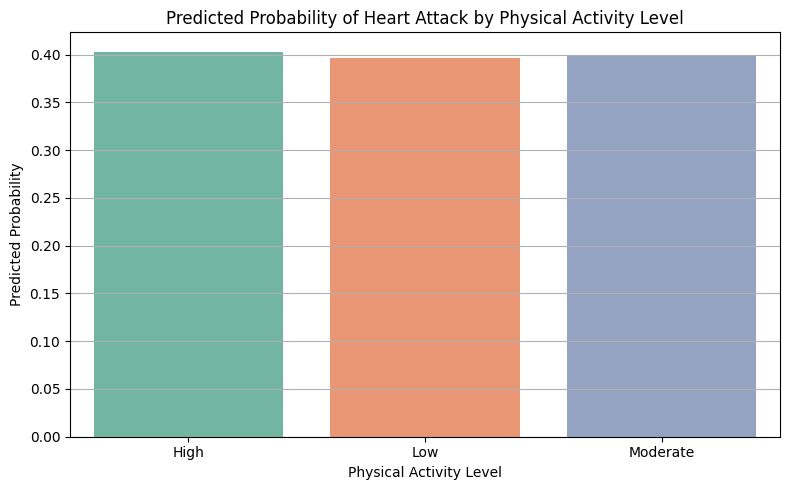

In [34]:
# Create a temporary DataFrame for plotting
temp_df = dataset_cleaned[['physical_activity']].copy()
temp_df['predicted_prob'] = predicted_probs

# Plotting average predicted probabilities
avg_probs = temp_df.groupby('physical_activity')['predicted_prob'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_probs, x='physical_activity', y='predicted_prob', palette='Set2')
plt.title('Predicted Probability of Heart Attack by Physical Activity Level')
plt.ylabel('Predicted Probability')
plt.xlabel('Physical Activity Level')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


as seen that none of them can break the null hypothesis (0). So, no attribute was added to the final dataset.

# Suggestions for Next Steps in Analyzing This Data


With the data now thoroughly cleaned, encoded, and statistically evaluated, the next logical step is to advance into the modeling phase. Techniques such as logistic regression, decision trees, or ensemble methods (e.g., Random Forest or XGBoost) can be employed to build predictive models that assess the likelihood of heart attack risk based on the selected features. Cross-validation and hyperparameter tuning should be used to evaluate model performance and avoid overfitting. Additionally, model interpretability tools like SHAP or feature importance plots can be applied to better understand which variables most influence the predictions. Finally, evaluating model accuracy, precision, recall, and AUC-ROC scores will help assess its effectiveness before deployment.

 # Summary of Data Quality and Recommendation for Additional Data

The dataset has undergone comprehensive preprocessing, which includes the handling of missing values, duplicate removal, outlier treatment, feature selection, and transformation. As a result, the dataset is now in a high-quality state, suitable for modeling purposes. Statistical tests have been used to objectively validate the relevance of features, ensuring that only statistically meaningful variables are retained. However, to further improve model performance and provide more nuanced insights, it is advisable to consider acquiring additional data. This could include more detailed medical history, lifestyle habits, or genetic information, which may reveal hidden patterns and enhance the predictive power of future models.